In [195]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from api_keys import quickstats_api


In [196]:
honey_data = []
honey_data = pd.DataFrame(honey_data)
honey_data["Year"] = ''
honey_data["State"] = ''

params = {
    'key': quickstats_api,
    'commodity_desc' : 'HONEY',
    'short_desc' : "HONEY, BEE COLONIES, AFFECTED BY VARROA MITES - INVENTORY, MEASURED IN PCT OF COLONIES",
}

base_url = 'https://quickstats.nass.usda.gov/api/api_GET/'


response = requests.get(base_url, params=params).json()

for x in (range(len(response['data']))):

    honey_data.loc[x,'Year'] = response['data'][x]['year']
    honey_data.loc[x,'Quarter'] = response['data'][x]['reference_period_desc']
    honey_data.loc[x,'State'] = response['data'][x]['location_desc']
    honey_data.loc[x,'Commodity'] = response['data'][x]['commodity_desc']
    honey_data.loc[x,'Data Type'] = response['data'][x]['short_desc']
    honey_data.loc[x,'Value'] = response['data'][x]['Value']
    


honey_data.head()


,Year,State,Quarter,Commodity,Data Type,Value
0,2017,US TOTAL,YEAR,HONEY,"HONEY, BEE COLONIES, AFFECTED BY VARROA MITES ...",26.3
1,2016,US TOTAL,YEAR,HONEY,"HONEY, BEE COLONIES, AFFECTED BY VARROA MITES ...",20.9
2,2015,US TOTAL,YEAR,HONEY,"HONEY, BEE COLONIES, AFFECTED BY VARROA MITES ...",19.8
3,2019,US TOTAL,JAN THRU MAR,HONEY,"HONEY, BEE COLONIES, AFFECTED BY VARROA MITES ...",45.6
4,2018,US TOTAL,JAN THRU MAR,HONEY,"HONEY, BEE COLONIES, AFFECTED BY VARROA MITES ...",40.7


In [197]:
#cleans data
honey_data["Value"] = pd.to_numeric(honey_data["Value"])
honey_data["Quarter"] = honey_data["Quarter"].str.replace(r'JAN THRU MAR','Q1')
honey_data["Quarter"] = honey_data["Quarter"].str.replace(r'APR THRU JUN','Q2')
honey_data["Quarter"] = honey_data["Quarter"].str.replace(r'JUL THRU SEP','Q3')
honey_data["Quarter"] = honey_data["Quarter"].str.replace(r'OCT THRU DEC','Q4')
honey_data = honey_data[honey_data["Quarter"] != 'YEAR']
honey_data["Value"] = pd.to_numeric(honey_data["Value"]) 

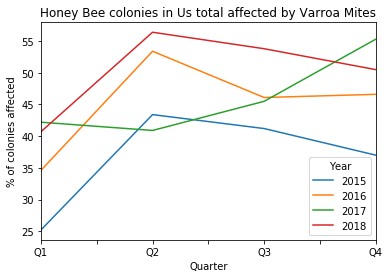

In [202]:
#collects input and then graphs
x = input("What State would you like to plot?")
x_upper = x.upper()
pest_data_by_state = honey_data.loc[honey_data["State"] == f"{x_upper}"]

pest_data_by_state = pest_data_by_state[pest_data_by_state["Quarter"] != 'YEAR']
pest_data_by_state = pest_data_by_state[pest_data_by_state["Year"] != 2019]
pest_data_by_state = pest_data_by_state.groupby(["Quarter", "Year"])

pest_data_by_state = pest_data_by_state["Value"].max()

pest_data_by_state.unstack().plot()
plt.title(f"Honey Bee colonies in {x.capitalize()} affected by Varroa Mites")
plt.xlabel("Quarter")
plt.ylabel(f"% of colonies affected")
plt.savefig('colonies_affected_by_varroa.png')
plt.show()